In [66]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('Data/ice_cream_sales.csv')

La correlación no tiene sentido 

In [68]:
df.corr()['sales']['price']

0.07554365164568473

Crea X y Y 

In [69]:
target = 'sales'

X = df.drop(target, axis=1)
X['price'] = X.price.round()
y = df[target]


Crea el modelo 

In [70]:
model = xgb.XGBRegressor(max_depth=3, n_estimators=100)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

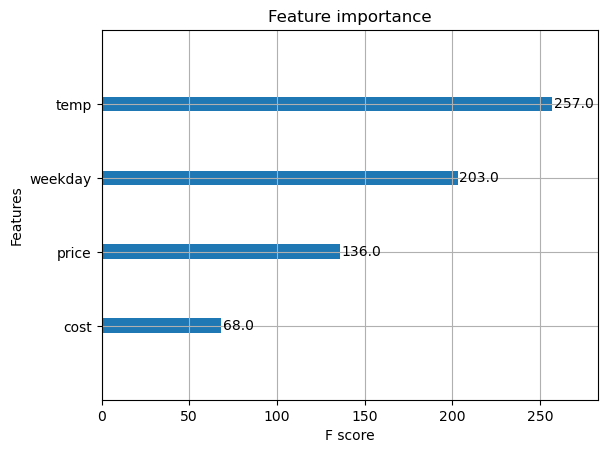

In [71]:
# Plot feature importance
xgb.plot_importance(model)

Distribución del precio

<Axes: >

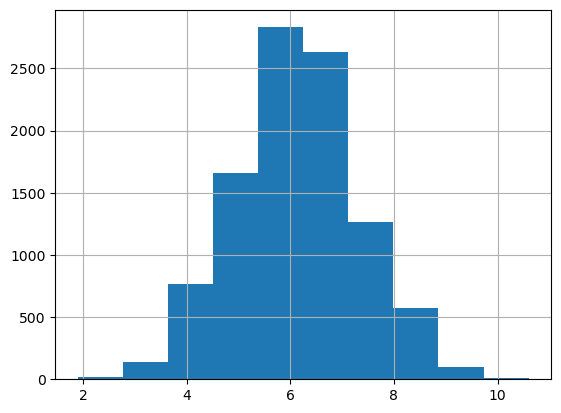

In [72]:
df.price.hist()

In [73]:
X['price'].value_counts()

price
6.0     3514
7.0     2262
5.0     1956
8.0     1106
4.0      835
9.0      212
3.0       84
10.0      20
2.0        9
11.0       2
Name: count, dtype: int64

# Crea un S learner

In [74]:
precios = [4, 5, 6, 7, 8]

In [75]:
ejemplo = X.loc[[300]]

In [76]:
ventas = []
for i in precios:
    ejemplo_copia = ejemplo.copy()
    ejemplo_copia['price'] = i
    ventas.append(model.predict(ejemplo_copia)[0])

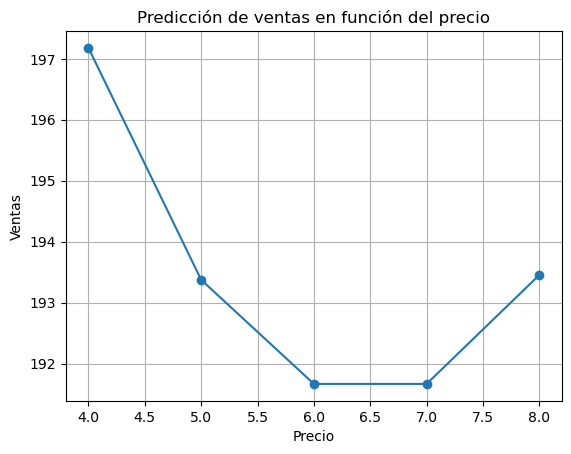

In [77]:
plt.plot(precios, ventas, marker="o")
plt.xlabel('Precio')
plt.ylabel('Ventas')
plt.title('Predicción de ventas en función del precio')
plt.grid()
plt.show()

In [78]:
X['price'].value_counts()

price
6.0     3514
7.0     2262
5.0     1956
8.0     1106
4.0      835
9.0      212
3.0       84
10.0      20
2.0        9
11.0       2
Name: count, dtype: int64